In [1]:
%cd ../

/Users/toz/Documents/workspace/Circle-of-Doom


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 100
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("husl", 8));
# see http://matplotlib.org/users/customizing.html
sns.mpl.rc("figure", figsize=(16,4)) # sns.set_style({'figure.figsize' : (16,4)})

In [3]:
df = pd.read_csv('data/tw-sp.csv')
print('Header:',', '.join(df.columns.values))
print('Number of rows and columns:',df.shape)
df = df[~df.href.str.contains('/videos/')] #CNN
df = df[(df.outlet != 'FoxNews') | ((df.outlet == 'FoxNews') & (df.href.str.contains('www.foxnews.com')))] #Fox
pd.pivot_table(df,columns=['outlet'],values=["href"],aggfunc=len)

Header: dt, outlet, rt, fav, sp, href
Number of rows and columns: (16530, 6)


outlet,ABC,AP,CBSNews,CNN,FoxNews,NBCNews,NYT,WPOST
href,1514,1894,1953,1685,1875,2544,2056,2667


In [4]:
def getCat(x):
    pieces = [piece.lower() for piece in x.href.split('/')]
    
    if x.outlet == 'CNN':
        return pieces[-3]
    elif x.outlet == 'NYT':
        return pieces[-2]
    elif x.outlet == 'ABC':
        return pieces[-3]
    elif x.outlet == 'NBCNews':
        if pieces[3]=='news':
            return pieces[4] if pieces[4]!='us-news' else 'us'
        if pieces[3]=='meet-the-press':
            return 'interview'
        return pieces[3]
    elif x.outlet == 'CBSNews':
        return pieces[-3]
    elif x.outlet == 'FoxNews':
        return pieces[3]
    elif x.outlet == 'AP':
        return pieces[-3]
    elif x.outlet == 'WPOST':
        return pieces[3] if pieces[3]!='pb' else pieces[4]

In [5]:
df['cats'] = df.apply(getCat,axis=1)
category = pd.pivot_table(df,index=["cats"],values=["href"],aggfunc=len).sort('href',ascending=False)

In [6]:
#categories with at least 101 links
category[category.href>100]

,href
cats,
news,2724
us,2336
article,1868
politics,1323
blogs,1237
world,1076
health,432
storyline,411
entertainment,406


In [7]:
#categories less than 100 but greater than 10 links
category[(category.href<100) & (category.href>10)]

,href
cats,
local,97
living,85
interview,83
weather,78
upshot,75
media,74
pop-culture,69
economy,64
leisure,57


In [8]:
bf= df[df.cats.isin(category[category.href>50].index)]
b = pd.pivot_table(bf,index=["cats"],columns=['outlet'],values=["href"],aggfunc=len)
b.fillna('')

href                                              
outlet         ABC    AP CBSNews  CNN FoxNews NBCNews  NYT WPOST
cats                                                            
americas                           23                   31      
article             1868                                        
asia                               60               2   82      
blogs                                                       1237
business        47                  1             160   72    27
economy                            37                   27      
entertainment  123                112     157                 14
europe                             61               5  109      
health         166                 59     101      81   25      
international  265                                      18      
interview                                          83           
leisure                                    57                   
lifestyle       68                                            65
living                             85                           
local                                                         97
magazine                                               108      
media                              45                   29      
middleeast                         74                  106      
news             1          1952   15                        756
nyregion                                               177      
opinion                            46      37           55      
politics       156                323     515      78  112   139
pop-culture                                        69           
science                                    45     145   54      
sports          52                         60      31   44     9
storyline                                         411           
tech                               18      54     122           
technology     108                 51                   41      
travel          16                 34      16           38      
upshot                                                  75      
us             507                351     475     739  264      
weather                                    24      54           
world                             109     334     384   39   210

In [9]:
def get_rtw(x):
    """ a helper function for kde plotting """
    a = []
    [a.append(x) for _ in range(int(x.rt/20))]
    return pd.DataFrame(a)

rtw = pd.DataFrame(columns=df.columns)
for row in df.iterrows():
    rtw = rtw.append(get_rtw(row[1]))

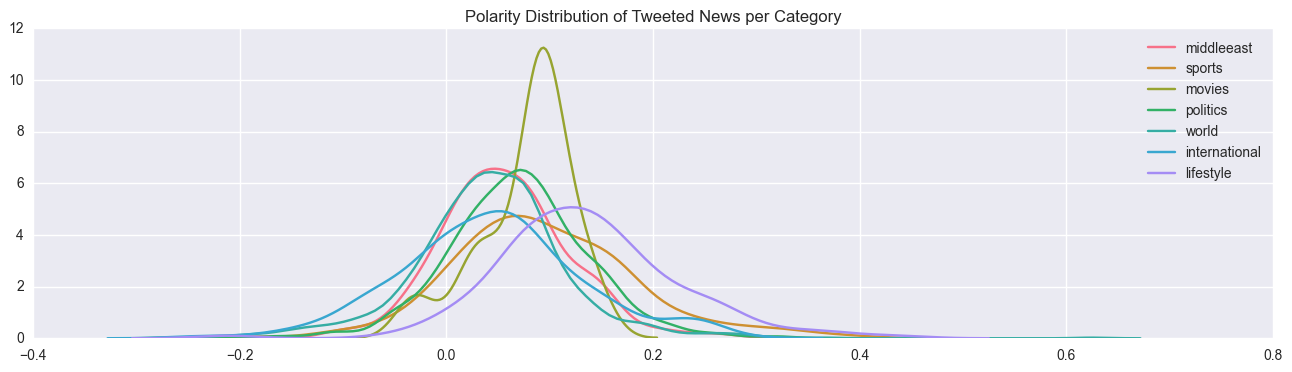

In [10]:
cs = ['middleeast','sports','movies','politics','world','international','lifestyle']
ax = [sns.kdeplot(df[df['cats']==c]['sp'],label=c) for c in cs][0]
ax.set_title('Polarity Distribution of Tweeted News per Category');

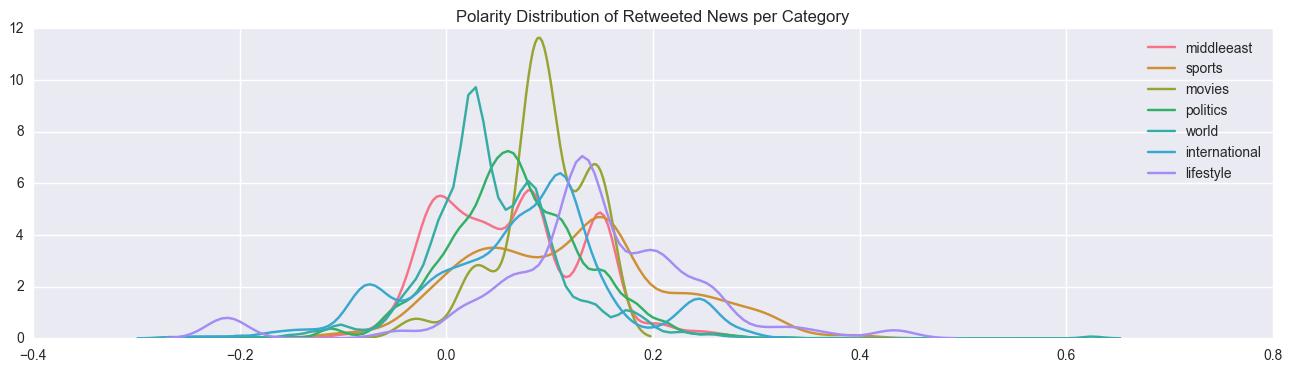

In [11]:
cs = ['middleeast','sports','movies','politics','world','international','lifestyle']
ax = [sns.kdeplot(rtw[rtw.cats==c]['sp'],label=c) for c in cs][0]
ax.set_title('Polarity Distribution of Retweeted News per Category');

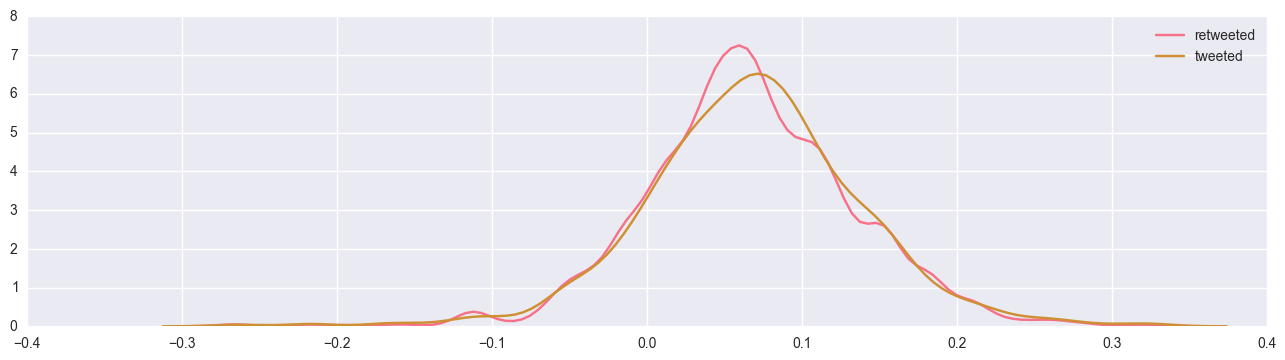

In [12]:
c='politics'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

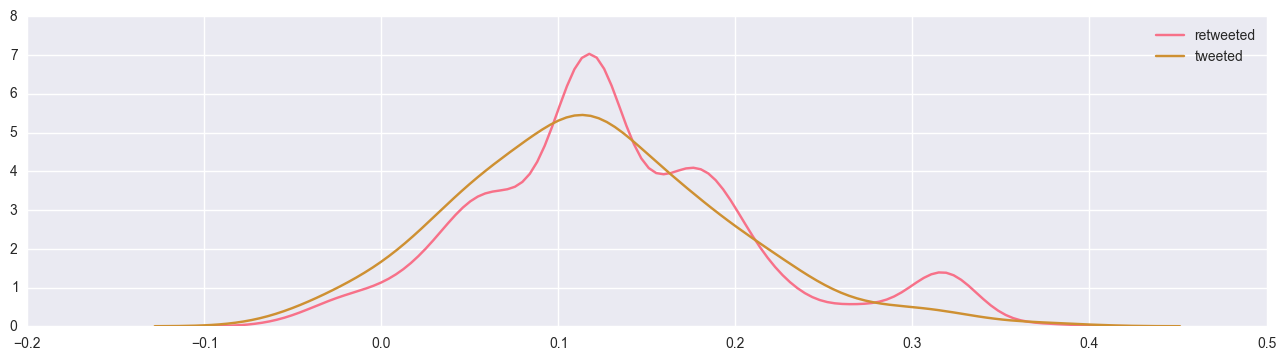

In [13]:
c='health'
sns.kdeplot(rtw[rtw.cats=='tech']['sp'],label='retweeted');
sns.kdeplot(df[df.cats=='tech']['sp'],label='tweeted');

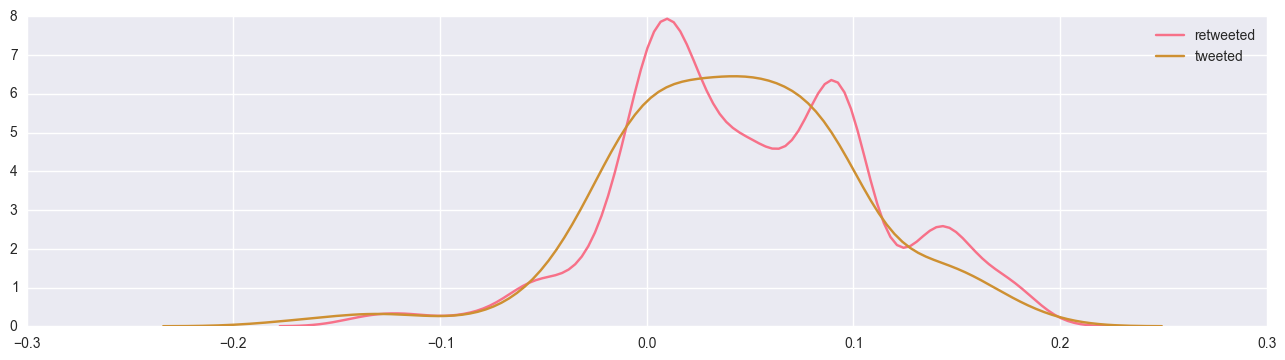

In [14]:
c='europe'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

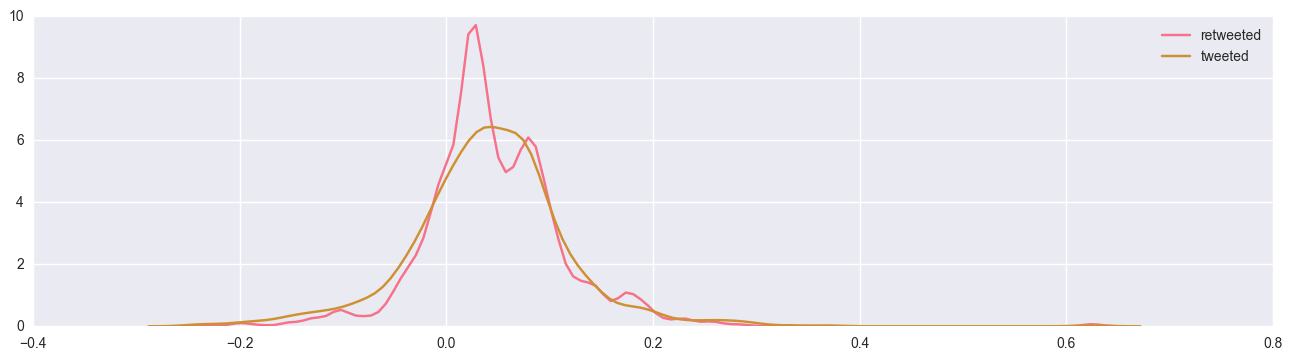

In [15]:
c='world'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

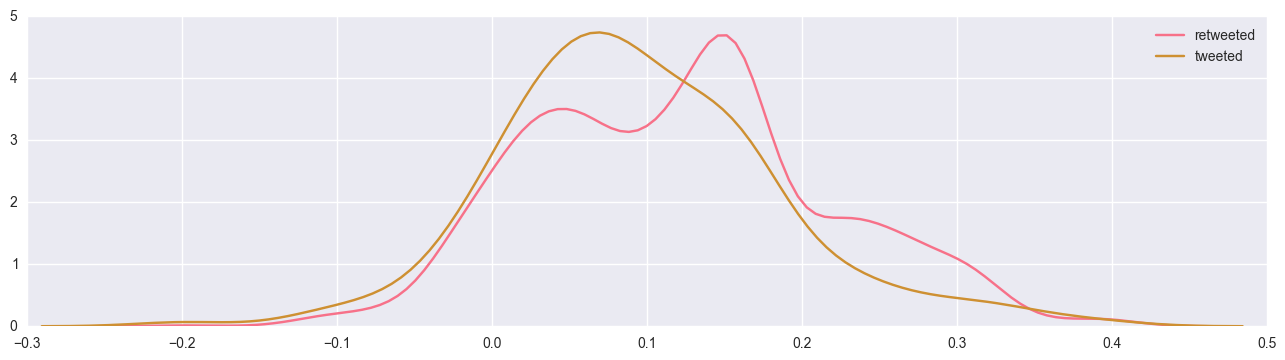

In [16]:
c='sports'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

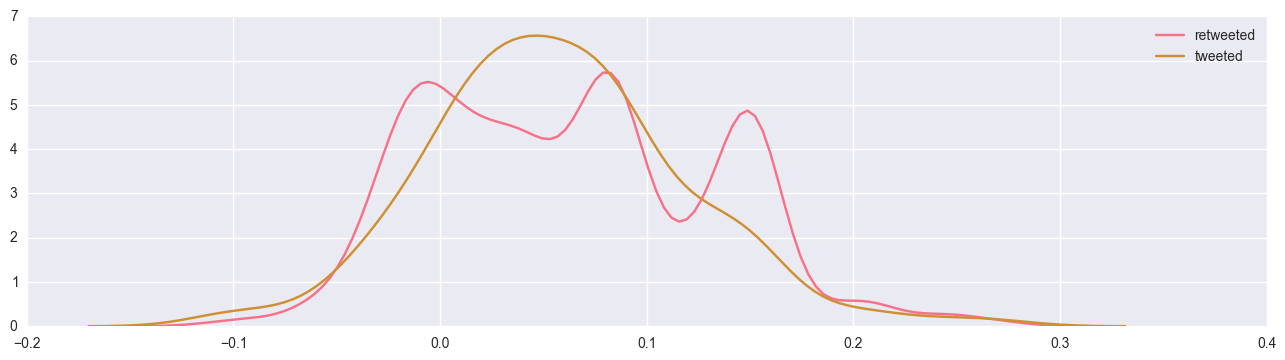

In [17]:
c='middleeast'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

In [18]:
grouped = bf.groupby('cats')
a = grouped.apply(lambda x: x.sp.mean()).reset_index()
a = a.rename(columns={0:'sp'})
a = a.sort(['sp'],ascending=False)
a = a.set_index(['cats'])

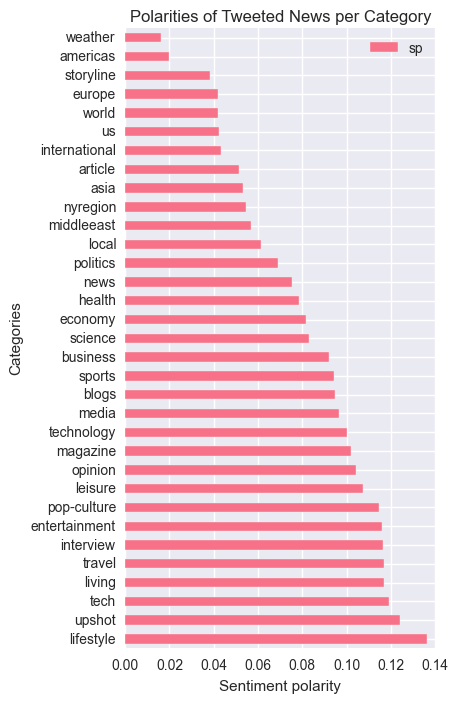

In [19]:
ax = a.plot(kind='barh',title='Polarities of Tweeted News per Category',figsize=(4,8))
ax.set_ylabel("Categories");
ax.set_xlabel("Sentiment polarity");